# Time Series Analysis
- Time sereies analysis is when you order series if data in order of time (ie. temprature buy day, stock market price, ect)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('../Data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])

### Activity: Opbtain the trend and seasonaility in air passenger dataset

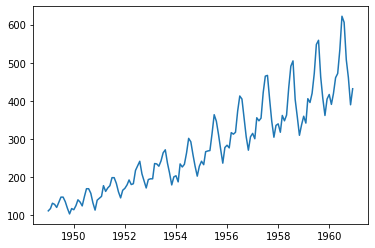

In [3]:
# Plot passenger time series
plt.plot(df['Month'], df['#Passengers'])

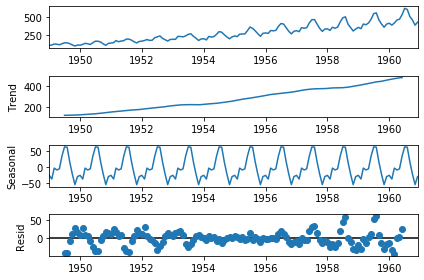

In [4]:
# Apply decompostion analysis to the time series
df  = df.set_index(['Month'])
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

## Sampling and Smoothing
- Time Series can have many inclines and declines. However, we want to get a smoother version of it and to do that we can either samplping or smoothing the time series 

### Activity: Time Series Sampling and Smoothing on AAPL dataset

In [25]:
aapl = pd.read_csv('../Data/AAPL.csv')
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl['Tick'] = range(len(aapl))

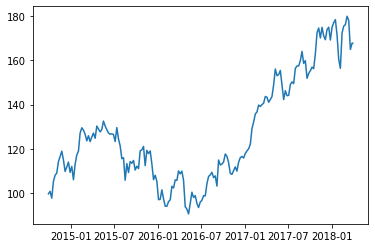

In [26]:
plt.plot(aapl['Date'], aapl['Close'], label='Original')
plt.show()

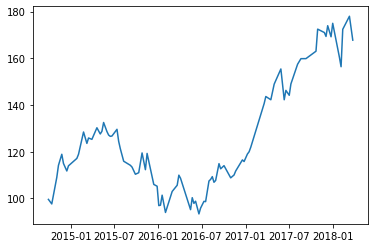

In [27]:
# Sample the time series
aapl_one_tenth = aapl.sample(frac=0.5)
aapl_one_tenth = aapl_one_tenth.sort_values(by=['Tick'])
plt.plot(aapl_one_tenth['Date'], aapl_one_tenth['Close'], label='Sampled')

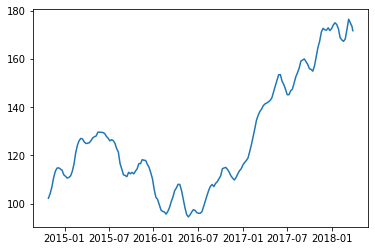

In [28]:
# Smooth the dataset
aapl['Roling_Mean'] = aapl['Close'].rolling(window=5).mean()
plt.plot(aapl['Date'], aapl['Roling_Mean'], label="Smooth")
plt.show()

### Activity: Compute the monthly return for Apple stock data for March 2017

In [30]:
# From compund rate of return formula
aapl['log_price'] = np.log(aapl['Close'])
x = np.diff(aapl['log_price'])
print(aapl)
print(x.sum()*100)

          Date        Open        High         Low       Close   Adj Close  \
0   2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1   2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2   2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3   2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4   2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   
..         ...         ...         ...         ...         ...         ...   
179 2018-03-05  175.210007  180.000000  174.270004  179.979996  179.979996   
180 2018-03-12  180.289993  183.500000  177.619995  178.020004  178.020004   
181 2018-03-19  177.320007  177.470001  164.940002  164.940002  164.940002   
182 2018-03-26  168.070007  175.149994  165.190002  167.779999  167.779999   
183 2018-03-29  167.804993  171.750000  166.899994  167.779999  167.779999   

        Volume  Tick  Roling_Mean  log_price  
0    142718700  

In [31]:
# Another way to compute the montly return
returns = aapl['Close'].pct_change()
print(returns.sum()*100)
print(np.log(143.66/139.79)*100)

62.731337296083126
2.7308100163618443


# Four Important Pandas Methods For Time Series Analysis
1. pd.to_datetime(): converts date scrings to dates/time
2. df.sample(): gets a sample of the data from the dataframe
3. df[''].rolling(window=?): 